In [1]:
import pandas as pd
import numpy as np 

### Carregando os dados

In [2]:
melbourne_data = pd.read_csv('data/melb_data.csv')

### Entendendo o dado

In [68]:
melbourne_data.shape

(6196, 22)

In [3]:
melbourne_data.describe()

,Unnamed: 0,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,18396.000000,18396.000000,1.839600e+04,18395.000000,18395.000000,14927.000000,14925.000000,14820.000000,13603.000000,7762.000000,8958.000000,15064.000000,15064.000000,18395.000000
mean,11826.787073,2.935040,1.056697e+06,10.389986,3107.140147,2.913043,1.538492,1.615520,558.116371,151.220219,1965.879996,-37.809849,144.996338,7517.975265
std,6800.710448,0.958202,6.419217e+05,6.009050,95.000995,0.964641,0.689311,0.955916,3987.326586,519.188596,37.013261,0.081152,0.106375,4488.416599
min,1.000000,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,5936.750000,2.000000,6.330000e+05,6.300000,3046.000000,2.000000,1.000000,1.000000,176.500000,93.000000,1950.000000,-37.858100,144.931193,4294.000000
50%,11820.500000,3.000000,8.800000e+05,9.700000,3085.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.803625,145.000920,6567.000000
75%,17734.250000,3.000000,1.302000e+06,13.300000,3149.000000,3.000000,2.000000,2.000000,651.000000,174.000000,2000.000000,-37.756270,145.060000,10331.000000
max,23546.000000,12.000000,9.000000e+06,48.100000,3978.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [4]:
melbourne_data.head()

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [7]:
list(melbourne_data.columns)

['Unnamed: 0',
 'Suburb',
 'Address',
 'Rooms',
 'Type',
 'Price',
 'Method',
 'SellerG',
 'Date',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'CouncilArea',
 'Lattitude',
 'Longtitude',
 'Regionname',
 'Propertycount']

### Removendo valores faltantes

In [8]:
melbourne_data = melbourne_data.dropna(axis=0)

### Escolhendo as caracteristicas

In [11]:
# Vamos separar o dado que queremos prever
y = melbourne_data.Price

In [12]:
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
X = melbourne_data[melbourne_features]

In [13]:
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


In [ ]:
X.head()

## Treinando o algoritmo

Os passos para construir e usar um modelo são
 * **Definir o modelo:** Que tipo de algoritmo vamos utilizar
 * **Treinar o modelo:**: usando o comando fit
 * **Prever**
 * **Avaliar a performance**: Determinar o quão acurado é o modelo



In [48]:
from sklearn.tree import DecisionTreeRegressor

# Especificar o random_state para assegurar o mesmo resultado sempre que rodar
melbourne_model = DecisionTreeRegressor(random_state=1)

melbourne_model.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [49]:
pred = X.head()
melbourne_model.predict(pred)

array([1035000., 1465000., 1600000., 1876000., 1636000.])

### Avaliação do modelo

Há muitas métricas para avaliar a perfomance do model, para este problema vamos utilizar o **Erro absoluto médio** (MAE) dado pelo módulo do valor real da casa menos o valor previsto.

 `erro = |valor_real - previsto|`

In [67]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = melbourne_model.predict(X)
mean_absolute_error(y, predicted_home_prices).round(2)

69101.42

### Avaliar na base de validação

In [66]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

# Define model
melbourne_model = DecisionTreeRegressor(random_state=1)

# Fit model
melbourne_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)
print("$", mean_absolute_error(val_y, val_predictions))

$ 273712.3376371853


### Número ótimo de folhas da arvore de decisão

In [28]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes = max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)


In [168]:
# comparar MAE com diferentes valores de folhas
list_leafs = np.arange(10, 5000, 200)
list_mae = []
list_mae_train = []
for max_leaf_nodes in list_leafs:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    my_mae_train = get_mae(max_leaf_nodes, X, X, y, y)
    list_mae.append(my_mae)
    list_mae_train.append(my_mae_train)


In [169]:
np.min(list_mae)

260805.36661213005

In [170]:
print(list_leafs[list_mae.index(np.min(list_mae))], "folhas")

810 folhas


### Overfitting vc Underfitting

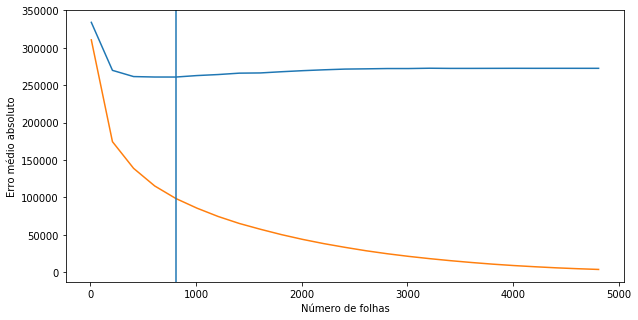

In [171]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 5))
plt.xlabel("Número de folhas")
plt.ylabel("Erro médio absoluto")
plt.plot(list_leafs, list_mae)
plt.plot(list_leafs, list_mae_train)
plt.axvline(list_leafs[list_mae.index(np.min(list_mae))])